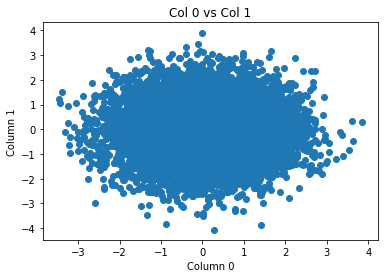

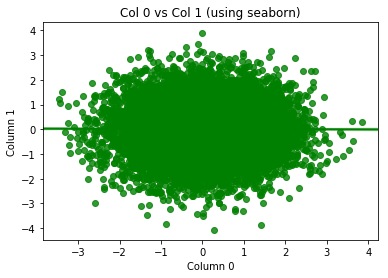

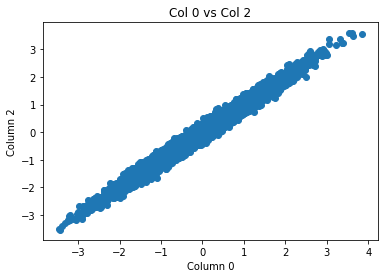

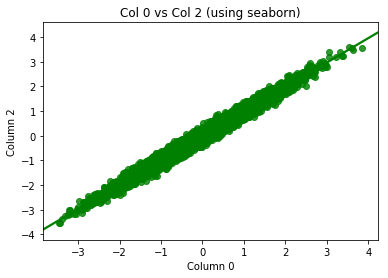

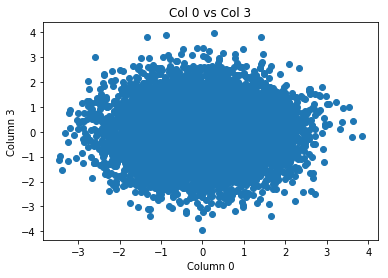

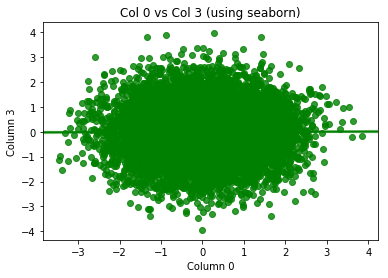

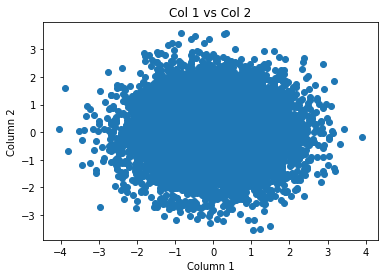

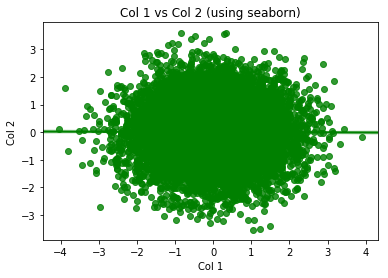

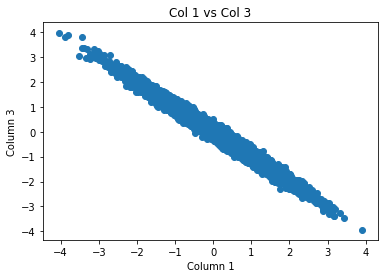

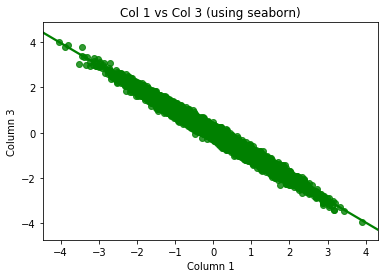

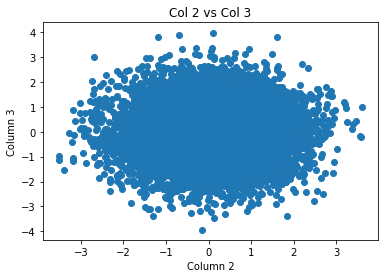

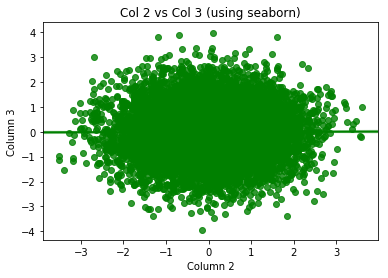

In [3]:
#Question 1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

df1 = pd.read_csv("Lab2_Data/DF1")

#column 0 and 1
#using matplotlib
plt.scatter(x = df1["0"], y = df1["1"])
plt.title("Col 0 vs Col 1")
plt.xlabel("Column 0")
plt.ylabel("Column 1")
plt.show()

#seaborn
axs = seaborn.regplot(x = df1["0"], y = df1["1"], color = 'g')
axs.set_title("Col 0 vs Col 1 (using seaborn)")
axs.set_xlabel("Column 0")
axs.set_ylabel("Column 1")
plt.show()

#column 0 and 2
#using matplotlib
plt.scatter(x = df1["0"], y = df1["2"])
plt.title("Col 0 vs Col 2")
plt.xlabel("Column 0")
plt.ylabel("Column 2")
plt.show()

axs1 = seaborn.regplot(x = df1["0"], y = df1["2"], color = 'g')
axs1.set_title("Col 0 vs Col 2 (using seaborn)")
axs1.set_xlabel("Column 0")
axs1.set_ylabel("Column 2")
plt.show()

#column 0 and 3
#using matplotlib
plt.scatter(x = df1["0"], y = df1["3"])
plt.title("Col 0 vs Col 3")
plt.xlabel("Column 0")
plt.ylabel("Column 3")
plt.show()

#using seaborn
ax2 = seaborn.regplot(x = df1["0"], y = df1["3"], color = 'g')
ax2.set_title("Col 0 vs Col 3 (using seaborn)")
ax2.set_xlabel("Column 0")
ax2.set_ylabel("Column 3")
plt.show()

#column 1 and 2
#using matplotlib
plt.scatter(x = df1["1"], y = df1["2"])
plt.title("Col 1 vs Col 2")
plt.xlabel("Column 1")
plt.ylabel("Column 2")
plt.show()

#using seaborn
ax3 = seaborn.regplot(x = df1["1"], y = df1["2"], color = 'g')
ax3.set_title("Col 1 vs Col 2 (using seaborn)")
ax3.set_xlabel("Col 1")
ax3.set_ylabel("Col 2")
plt.show()

#column 1 and 3
#using matplotlib
plt.scatter(x = df1["1"], y = df1["3"])
plt.title("Col 1 vs Col 3")
plt.xlabel("Column 1")
plt.ylabel("Column 3")
plt.show()

#using seaborn
ax4 = seaborn.regplot(x = df1["1"], y = df1["3"], color = 'g')
ax4.set_title("Col 1 vs Col 3 (using seaborn)")
ax4.set_xlabel("Column 1")
ax4.set_ylabel("Column 3")
plt.show()

#column 2 and 3
#using matplotlib
plt.scatter(x = df1["2"], y = df1["3"])
plt.title("Col 2 vs Col 3")
plt.xlabel("Column 2")
plt.ylabel("Column 3")
plt.show()

#seaborn
ax5 = seaborn.regplot(x = df1["2"], y = df1["3"], color= 'g')
ax5.set_title("Col 2 vs Col 3 (using seaborn)")
ax5.set_xlabel("Column 2")
ax5.set_ylabel("Column 3")
plt.show()



In [4]:
#Question 1 continued ...

#calculating the covariance
X = np.stack((df1["0"], df1["1"], df1["2"], df1["3"]), axis = 0)
covMatrix = np.cov(X)
print(covMatrix)



[[ 1.00155793 -0.00401176  0.99162409  0.00412485]
 [-0.00401176  1.00537841 -0.00409877 -0.99545662]
 [ 0.99162409 -0.00409877  1.00158867  0.00408108]
 [ 0.00412485 -0.99545662  0.00408108  1.00516828]]


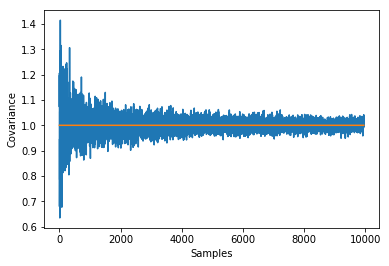

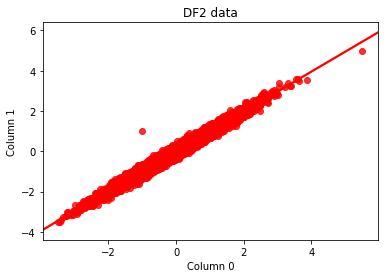

In [202]:
#Question 2

cov = [[1, 0, 0],[0, 1, 1],[0, 1, 1]]
mean = [0, 0, 0]

estimated_covariances = []
y1 = []
for i in range(50, 10000):
    X1, X2, X3 = np.random.multivariate_normal(mean, cov, i).T
    temp = np.cov(X2, X3)
    estimated_covariances.append(temp[0][1])
    y1.append(1)

plt.plot(estimated_covariances)
plt.xlabel("Samples")
plt.ylabel("Covariance")
plt.plot(y1)
plt.show()


path = "/Users/pratyushsingh/Downloads/Lab2_Data/DF2"
df2 = pd.read_csv(path)
axs1 = seaborn.regplot(x = df2["0"], y = df2["1"], color = 'r')
axs1.set_title("DF2 data")
axs1.set_xlabel("Column 0")
axs1.set_ylabel("Column 1")
plt.show()




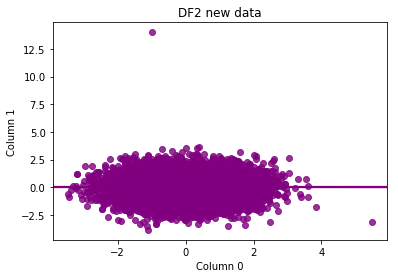

In [204]:
#2b
df2_new = df2.iloc[:,1:3] #remove the column that has the indexes
Q = np.linalg.cholesky(np.cov(df2_new["0"], df2_new["1"])) #compute cholesky to get Q
Q_inverse = np.linalg.inv(Q) #take inverse
df2_new = np.matmul(Q_inverse, np.transpose(df2_new)) #transpose df2_new so the dimensions match

data = {"0": df2_new[0], "1": df2_new[1]} #turn df2_new into a panda data frame
df2_new = pd.DataFrame(data=data)
axis = seaborn.regplot(x = df2_new["0"], y = df2_new["1"], color = 'purple')
axis.set_title("DF2 new data")
axis.set_xlabel("Column 0")
axis.set_ylabel("Column 1")
plt.show()


In [200]:
#Question 3
#yi = -3 + ei ~ N(0, 1)

mean = 0
std = 1
n = 150
b0 = -3
beta = 0
error = []
for i in range(1, 1000):
    xi = np.random.normal(mean, std, n)
    ei = np.random.normal(mean, std, n)
    yi = b0 + beta * xi + ei
    
    b_carrot = np.dot(yi, xi)/np.dot(xi, xi)
    stdev = b_carrot #you would subtract beta, but beta is 0
    error.append(stdev)

print(np.std(error))



0.261913365866


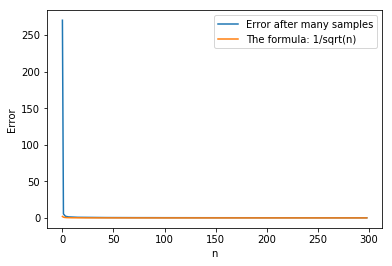

In [211]:
#Question 3b
n = np.arange(1, 300)
samples = np.arange(1, 1000)

deviation = []
true_deviation = []
b0 = -3
beta = 0
mean = 0
std = 1
for i in n:
    error = []
    for j in samples:
        xi = np.random.normal(mean, std, i)
        ei = np.random.normal(mean, std, i)
        yi = b0 + beta * xi + ei
        
        b_carrot = np.dot(yi, xi)/np.dot(xi, xi)
        stdev = b_carrot
        error.append(stdev)
    
    deviation.append(np.std(error))
    true_deviation.append((1/(i ** 1/2)))

dev_line, = plt.plot(deviation)
trueDev_line, = plt.plot(true_deviation)
plt.legend((dev_line, trueDev_line), ("Error after many samples", "The formula: 1/sqrt(n)"))
plt.xlabel("n")
plt.ylabel("Error")
plt.show()

In [105]:
#Question 4
import pandas as pd
import numpy as np

#### part A #####
numOfNames = int(raw_input("How many names do you want?"))
year = raw_input("Enter a year from 1880-2015")
filePath = "C:\Users\gydoy\Documents\EE379K\lab2\Names" + "\yob" + year + ".txt"
print filePath

df = pd.read_csv(filePath, names = ["Name","Gender","Frequency"])
# names = pd.DataFrame.from_csv(filePath)
# names.nlargest(numOfNames, "Frequency")


df["total"] = df.groupby(['Name'])['Frequency'].transform('sum')
df['total']= df["total"].drop_duplicates(keep="first")
dfResults = df.sort_values('total', ascending=False).head(numOfNames)

print(dfResults.loc[:,['Name', 'total']])


#####  part B  #####
name = raw_input("Enter a name ")
freqMale=0
freqFemale = 0
for i in range(1880,2016):
    filePath = "C:\Users\gydoy\Documents\EE379K\lab2\Names\yob"+ str(i) + ".txt"
    df = pd.read_csv(filePath, names = ["Name","Gender","Frequency"])
    #select all instances of the name
    df = df.loc[df['Name']==name,['Name','Gender','Frequency']] 
    
    df1 = df.loc[df['Gender']=='F',['Name','Gender','Frequency']]
    if df1.empty:
        continue
    else:
        freqMale = freqMale + int(df1.iloc[0]['Frequency'])
        
    df2 = df.loc[df['Gender']=='M',['Name','Gender','Frequency']]
    if df2.empty:
        continue
    else:
        freqFemale = freqFemale + int(df2.iloc[0]['Frequency'])
        
print(name + " M  " + str(freqMale))
print(name + " F  " + str(freqFemale))


######  part C  #######
name = raw_input("Enter a name ")

for i in range(2011,2016):
    #initialize variables
    freqMale=0
    freqFemale = 0
    total = 0
    
    #get file path
    filePath = "C:\Users\gydoy\Documents\EE379K\lab2\Names\yob"+ str(i) + ".txt"
    df = pd.read_csv(filePath, names = ["Name","Gender","Frequency"])
    
    #select all instances of the name
    df0 = df.loc[df['Name']==name,['Name','Gender','Frequency']] 
    
    #calculate frequency of name
    df1 = df0.loc[df['Gender']=='F',['Name','Gender','Frequency']]
    if df1.empty:
        continue
    else:
        freqMale = freqMale + int(df1.iloc[0]['Frequency'])
        
    df2 = df0.loc[df['Gender']=='M',['Name','Gender','Frequency']]
    if df2.empty:
        continue
    else:
        freqFemale = freqFemale + int(df2.iloc[0]['Frequency'])
        
    #calculate total number of names
    df['total'] = df.groupby(['Name'])['Frequency'].transform('sum')
    df['total']= df["total"].drop_duplicates(keep="first")
    total = total + df['total'].sum()
    
    print("Relative frequency of " + name + " in " + str(i) + ": " + str((freqMale+freqFemale)/total))




#######  part D  ######

results = []
start = raw_input("Enter a start year")
end = raw_input("Enter an end year")

#iterate thru year A
for i in range(int(start),int(end)):
    filePath = "C:\Users\gydoy\Documents\EE379K\lab2\Names\yob" + str(i) + ".txt"
    df = pd.read_csv(filePath, names = ["Name","Gender","Frequency"])
    MaleDF = df.loc[df['Gender']=='M',['Name','Gender','Frequency']]
    FemaleDF = df.loc[df['Gender']=='F',['Name','Gender','Frequency']]     
    

    #iterate through each name for Males
    for row in MaleDF.itertuples():
        FemaleDuplicate = df.loc[df['Name']==row[1],['Name','Gender','Frequency']]
        #print(FemaleDuplicate)
        FemaleDuplicate = FemaleDuplicate.loc[FemaleDuplicate['Gender']== 'F',['Name','Gender','Frequency']]
        name = row[1]
#         print(int(FemaleDuplicate.iloc[0]['Frequency']))
#         print(row[2])
        if not FemaleDuplicate.empty:
            if int(FemaleDuplicate.iloc[0]['Frequency'])== row[3]:
                continue;
            elif int(FemaleDuplicate.iloc[0]['Frequency'])> row[3]:
                nameFlag = "F"
            else:
                nameFlag = "M"
            #print(nameFlag + " F not empty, Male: " + str(row[3]) + " Female: " + str(FemaleDuplicate.iloc[0]['Frequency']))
        else:
            nameFlag = "M"
            #print(nameFlag + ", F was empty")
        
        #check if more popular for M or F in year B
        for j in range(i+1,int(end)+1):
            #Check if K has same or different gender popularity
            filePath = "C:\Users\gydoy\Documents\EE379K\lab2\Names\yob" + str(j) + ".txt"
            df1 = pd.read_csv(filePath, names = ["Name","Gender","Frequency"])
            nameDF = df1.loc[df1['Name']== name,['Name','Gender','Frequency']]
            #print(nameDF)
            femaleDF = nameDF.loc[nameDF['Gender']=="F",['Name','Gender','Frequency']]
            maleDF = nameDF.loc[nameDF['Gender']=="M",['Name','Gender','Frequency']]
            
            #Is F > M?
            if not femaleDF.empty and not maleDF.empty:
                if int(femaleDF.iloc[0]['Frequency'])> int(maleDF.iloc[0]['Frequency']):
                        nameFlag1 = "F"
                else:
                        nameFlag1 = "M"
            else:
                if femaleDF.empty and not maleDF.empty:
                    nameFlag1="M"
                elif maleDF.empty and not femaleDF.empty:
                    nameFlag1 = "F"
                else:
                    nameFlag1 = nameFlag
            #print(nameFlag1)
            
            #if change in gender popularity
            if(nameFlag1 != nameFlag):
                if(name in results):
                    continue
                else:
                    results.append(name)#add to results
                    print(name + " changed in year: " + str(j) + " from year "+ str(i))
                    break
            else:
                continue
    
    ##Do same exact as above but for Female list from year A  
    for row in FemaleDF.itertuples():
        maleDuplicate = df.loc[df['Name']==row[1],['Name','Gender','Frequency']]
        #print(maleDuplicate)
        maleDuplicate = maleDuplicate.loc[maleDuplicate['Gender']== 'M',['Name','Gender','Frequency']]
        name = row[1]
#         print(int(FemaleDuplicate.iloc[0]['Frequency']))
#         print(row[2])
        if not maleDuplicate.empty:
            if int(maleDuplicate.iloc[0]['Frequency'])== row[3]:
                continue;
            elif int(maleDuplicate.iloc[0]['Frequency'])> row[3]:
                nameFlag = "M"
            else:
                nameFlag = "F"
            #print(nameFlag + " M not empty, Female: " + str(row[3]) + " Male: " + str(maleDuplicate.iloc[0]['Frequency']))
        else:
            nameFlag = "F"
            #print(nameFlag + ", M was empty")
        
        #check if more popular for M or F in year B
        for j in range(i+1,int(end)+1):
            #Check if K has same or different gender popularity
            filePath = "C:\Users\gydoy\Documents\EE379K\lab2\Names\yob" + str(j) + ".txt"
            df1 = pd.read_csv(filePath, names = ["Name","Gender","Frequency"])
            nameDF = df1.loc[df1['Name']== name,['Name','Gender','Frequency']]
            #print(nameDF)
            femaleDF = nameDF.loc[nameDF['Gender']=="F",['Name','Gender','Frequency']]
            maleDF = nameDF.loc[nameDF['Gender']=="M",['Name','Gender','Frequency']]
            
            #Is F > M?
            if not femaleDF.empty and not maleDF.empty:
                if int(femaleDF.iloc[0]['Frequency'])> int(maleDF.iloc[0]['Frequency']):
                        nameFlag1 = "F"
                else:
                        nameFlag1 = "M"
            else:
                if femaleDF.empty and not maleDF.empty:
                    nameFlag1="M"
                elif maleDF.empty and not femaleDF.empty:
                    nameFlag1 = "F"
                else:
                    nameFlag1 = nameFlag
            #print(nameFlag1)
            
            #if change in gender popularity
            if(nameFlag1 != nameFlag):
                if(name in results):
                    continue
                else:
                    results.append(name)#add to results
                    print(name + " changed in year: " + str(j) + " from year "+ str(i))
                    break
            else:
                continue

    
    
print("Names that have changed popularity in gender: ")
print(results)

In [92]:
#Question 5
state_data = [["Alabama", "AL", "Montgomery"],
["Alaska","AK", "Juneau"],
["Arizona","AZ", "Phoenix"],
["Arkansas","AR", "Little Rock"],
["California","CA", "Sacramento"],
["Colorado","CO", "Denver"],
["Connecticut","CT", "Hartford"],
["Delaware","DE", "Dover"],
["Florida","FL", "Tallahassee"],
["Georgia","GA", "Atlanta"],
["Hawaii","HI","Honolulu"],
["Idaho","ID", "Boise"],
["Illinois","IL", "Springfield"],
["Indiana","IN", "Indianapolis"],
["Iowa","IA", "Des Moines"],
["Kansas","KS", "Topeka"],
["Kentucky","KY", "Frankfort"],
["Louisiana","LA", "Baton Rouge"],
["Maine","ME", "Augusta"],
["Maryland","MD", "Annapolis"],
["Massachusetts","MA", "Boston"],
["Michigan","MI", "Lansing"],
["Minnesota","MN", "St. Paul"],
["Mississippi", "MS", "Jackson"],
["Missouri","MO", "Jefferson City"],
["Montana","MT", "Helena"],
["Nebraska","NE", "Lincoln"],
["Nevada","NV", "Carson City"],
["New Hampshire","NH", "Concord"],
["New Jersey","NJ", "Trenton"],
["New Mexico","NM", "Santa Fe"],
["New York","NY", "Albany"],
["North Carolina","NC", "Raleigh"],
["North Dakota","ND", "Bismarck"],
["Ohio","OH", "Columbus"],
["Oklahoma","OK", "Oklahoma City"],
["Oregon","OR", "Salem"],
["Pennsylvania","PA", "Harrisburg"],
["Rhode Island", "RI", "Providence"],
["South Carolina","SC", "Columbia"],
["South Dakota","SD", "Pierre"],
["Tennessee","TN", "Nashville"],
["Texas","TX", "Austin"],
["Utah", "UT", "Salt Lake City"],
["Vermont", "VT", "Montplier"],
["Virginia","VA", "Richmond"],
["Washington", "WA", "Olympia"],
["West Virginia","WV", "Charleston"],
["Wisconsin","WI", "Madison"],
["Wyoming","WY", "Cheyenne"]]

states = []
state_abr = []
capitals =  []
for i in state_data:
    states.append(i[0])
    state_abr.append(i[1])
    capitals.append(i[2])

data = {"states" : np.array(states), "state_abr" : np.array(state_abr), "capitals" : np.array(capitals)}
stateDF = pd.DataFrame(data=data)

tweets = pd.read_csv("tweets.csv")

def getLocation(row):
    userLocation = []
    location = row['user_location']
    
    if(type(location) is not str):
        userLocation.append("")
        return ",".join(userLocation)
    
    
    location = location.strip()
    found = False
    
    for index, row in stateDF.iterrows():
        state = row['states']
        state_abr = row['state_abr']
        capital = row['capitals']
        
        if state in location or state_abr in location or capital in location:
            found = True
            userLocation.append(state)
            break
    
    if(found == False): #assume it is not found at this point
        userLocation.append("")
    
    return ",".join(userLocation)

tweets["state"] = tweets.apply(getLocation, axis=1)

print(tweets)


            id              id_str                  user_location  \
0            1  729828033092149248                    Wheeling WV   
1            2  729828033092161537                            NaN   
2            3  729828033566224384                            NaN   
3            4  729828033893302272                         global   
4            5  729828034178482177                California, USA   
5            6  729828014075293696                    Northern VA   
6            7  729828034178584576                            NaN   
7            8  729828034467926016                was calebsheIby   
8            9  729828034317058049                   New York, NY   
9           10  729828034560155648                 Pittsburgh, PA   
10          11  729828033939525633                            NaN   
11          12  729828034836996096                            NaN   
12          13  729828034631475200                            NaN   
13          14  729828034841333765

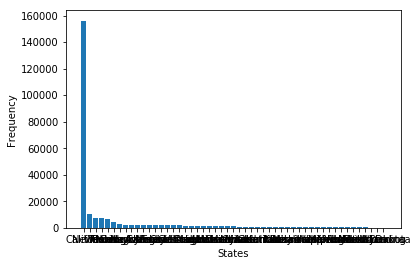

In [199]:
x = np.arange(51)
frequency = tweets['state'].value_counts()
state_labels = frequency.index.tolist()
fig, ax = plt.subplots()
plt.bar(x, frequency)
plt.xlabel("States")
plt.xticks(x, list(state_labels))
plt.ylabel("Frequency")
plt.show()